## Локальный и глобальный поиск

Решите задачу коммивояжера на основе файла данных `hw9_data/tsp.csv`: найти минимальный НЕЦИКЛИЧЕСКИЙ путь (начинается и заканчивается в разных точках), соединяющий N точек. Файл содержит координаты каждого из городов на плоскости (1й столбец - номер города, 2й и 3й - координаты). Используйте L1 расстояние для расчетов и визуализации.



In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv('hw9_data/tsp.csv', header=None)

def l1(a):
    diff = a[1:]-a[:-1]
    return np.linalg.norm(diff[:,1], ord=1)+np.linalg.norm(diff[:,2], ord=1)

def flip(a, i, j):
    t = np.copy(a[i])
    a[i] = np.copy(a[j])
    a[j] = t

### Задание 1 (1 балл) 

Реализуйте Монте-Карло поиск.

In [14]:
def monte_carlo(n_tries, df):
    a = df.copy().to_numpy()
    min_distance = 0
    route = []
    for i in range(n_tries):
        current_distance = l1(a)
        if i == 0 or current_distance < min_distance:
            min_distance = current_distance
            route = np.copy(a[:,0])
        np.random.shuffle(a)
    return route, min_distance

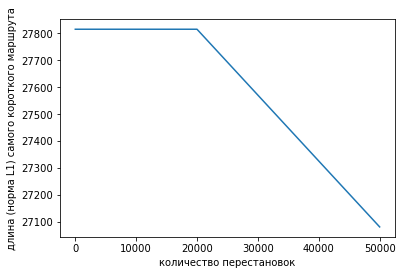

самый короткий маршрут: [ 8 51 20 36 25  7 42 21 23 48 38  3 41 46 16  5 47 26 28 37  6 24 30  2
 19 45  4 35 10 49 44 50 29 27 40 15 32 22 31  1 34 11 12 17 18  9 33 13
 43 39 52 14]
длина (норма L1) самого короткого маршрута: 27080.0


In [17]:
route = []
dist = 1000000000
xs = [10, 100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
ys = []
for x in xs:
    r, d = monte_carlo(x, df)
    ys.append(d)
    if d < dist:
        dist = d
        route = r
plt.plot(xs, ys)
plt.xlabel('количество перестановок')
plt.ylabel('длина (норма L1) самого короткого маршрута')
plt.show()
print('самый короткий маршрут:', route)
print('длина (норма L1) самого короткого маршрута:', dist)

### Задание 2 (1 балл) 

Реализуйте поиск случайным блужданием.

In [29]:
def random_walk(n_starts, n_steps, df):
    a = df.copy().to_numpy()
    n = len(a)
    min_distance = 0
    route = []
    for _ in range(n_starts):
        for _ in range(n_steps):
            pair = np.random.choice(n, 2, replace=False)
            flip(a, pair[0], pair[1])
            current_distance = l1(a)
            if min_distance == 0 or current_distance < min_distance:
                min_distance = current_distance
                route = np.copy(a[:,0])
        np.random.shuffle(a)
    return route, min_distance

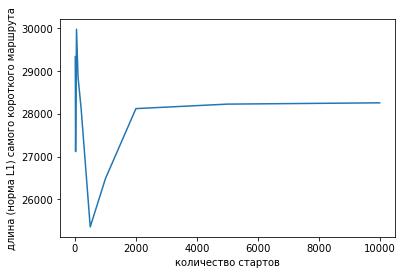

количество блужданий после каждого старта = 10000 / количество стартов
самый короткий маршрут: [ 1  2  3  4  5  6 41  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 43 40  7 42 39 44 45 46 47 48
 49 50 51 52]
длина (норма L1) самого короткого маршрута: 25355.0


In [30]:
route = []
dist = 1000000000
xs = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
ys = []
for x in xs:
    r, d = random_walk(x, int(10000/x), df)
    ys.append(d)
    if d < dist:
        dist = d
        route = r
plt.plot(xs, ys)
plt.xlabel('количество стартов')
plt.ylabel('длина (норма L1) самого короткого маршрута')
plt.show()
print('количество блужданий после каждого старта = 10000 / количество стартов')
print('самый короткий маршрут:', route)
print('длина (норма L1) самого короткого маршрута:', dist)

### Задание 3 (2 балла) 

Реализуйте Hill Climb.

In [32]:
def hill_climb(n_steps, df):
    a_best = df.copy().to_numpy()
    n = len(a_best)
    d = 0
    for _ in range(n_steps):
        a = np.copy(a_best)
        for i in range(n):
            for j in range(i+1, n):
                flip(a, i, j)
                current_distance = l1(a)
                if d == 0 or current_distance < d:
                    d = current_distance
                    a_best = np.copy(a)
                flip(a, j, i)
    return a_best[:,0], d

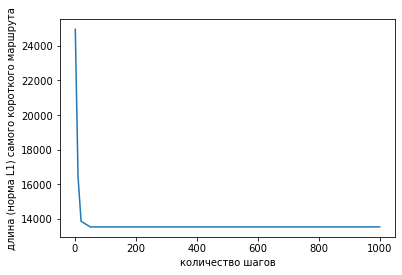

самый короткий маршрут: [ 8 41 19 38  5 15 43 10  9 33 11 52 13 14 47 16 44 45  3 18 23 20 50 46
 25 28 27 26 29 30 31 22  1 34 35 36 37 40 39 21 42  2  7 17 32 49 48 24
  6  4 12 51]
длина (норма L1) самого короткого маршрута: 13520.0


In [33]:
route = []
dist = 1000000000
xs = [1, 10, 20, 50, 100, 200, 500, 1000]
ys = []
for x in xs:
    r, d = hill_climb(x, df)
    ys.append(d)
    if d < dist:
        dist = d
        route = r
plt.plot(xs, ys)
plt.xlabel('количество шагов')
plt.ylabel('длина (норма L1) самого короткого маршрута')
plt.show()
print('самый короткий маршрут:', route)
print('длина (норма L1) самого короткого маршрута:', dist)

### Задание 4 (3 балла) 


Реализуйте отжиг (simulated annealing). Температурный режим отжига выберите самостоятельно.

In [42]:
def annealing(n_steps, df):
    a = df.copy().to_numpy()
    n = len(a)
    for step in range(n_steps):
        d = l1(a)
        deltas = []
        ijs = []
        for i in range(n):
            for j in range(i+1, n):
                flip(a, i, j)
                delta = d - l1(a)
                if delta > 0:
                    deltas.append(delta)
                    ijs.append((i, j))
                flip(a, j, i)
        if len(deltas) == 0:
            print(step)
            return a[:,0], d
        p = np.array(deltas)/sum(deltas)
        k = np.random.choice(len(ijs), p=p)
        flip(a, ijs[k][0], ijs[k][1])
    return a[:,0], l1(a)  

In [43]:
print(annealing(100, df))

64
(array([17, 18, 49, 39,  6,  4, 43, 10,  9, 33, 28, 27, 13, 14, 47, 26, 29,
       16, 35, 36, 37, 40, 38,  5, 15, 24, 46, 44, 23, 21,  3, 41,  8, 19,
       45, 32, 22,  1, 50, 20, 42,  2,  7, 30, 31, 34, 48, 25, 12, 51, 11,
       52]), 11985.0)


### Задание 5 (3 балла) 

Реализуйте генетический алгоритм.